## LASSO Regression

Least Absolute Shrinkage Operator 

(Blurb about LASSO)

### Importing Packages

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

### Importing Data/Data Cleaning

In [3]:
df = pd.read_csv("Data/data.csv")
df

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28
3,29,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,37
4,6,1,2,1,1,1,2,1,2,1,...,2,1,2,2,2,0,1,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,2,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,243,1,24
11239,10,2,2,1,1,1,2,1,1,1,...,2,1,2,1,2,2,1,197,1,39
11240,6,1,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,447,2,33
11241,12,2,2,1,1,1,1,1,1,1,...,1,2,2,2,2,2,1,167,1,24


<IPython.core.display.Javascript object>

In [4]:
# Renaming columns
# Will delete after df is saved in EDA
df = df.set_axis(
    [
        "score",
        "Influence",
        "Modesty",
        "Daring",
        "Confidence",
        "Ruling",
        "Responsibility",
        "IntrovExtro",
        "Success",
        "Humble",
        "Leadership",
        "Assertive",
        "Authority",
        "Manipulate",
        "Respect",
        "ShowOffBody",
        "AnalyzePeople",
        "Decision Responsibility",
        "HappyvMeaning",
        "BodyConfidence",
        "ShowOff",
        "KnowWhattoDo",
        "Dependence",
        "Storytelling",
        "Expectations",
        "Satisfaction",
        "Compliments",
        "Power",
        "Trendy",
        "Mirror",
        "CenterofAttention",
        "Freedom",
        "Authority",
        "LeaderPreference",
        "Confidence in Success",
        "MakeBelieve",
        "Leadership Origin",
        "Biography",
        "Public Opinion",
        "Capability",
        "Extraordinary",
        "elapse",
        "gender",
        "age",
    ],
    axis="columns",
    inplace=False,
)

<IPython.core.display.Javascript object>

In [5]:
df.iloc[:, 1:41] = df.iloc[:, 1:41] - 1

<IPython.core.display.Javascript object>

In [6]:
df

,score,Influence,Modesty,Daring,Confidence,Ruling,Responsibility,IntrovExtro,Success,Humble,...,Confidence in Success,MakeBelieve,Leadership Origin,Biography,Public Opinion,Capability,Extraordinary,elapse,gender,age
0,18,1,1,1,1,0,1,0,1,1,...,0,0,1,1,1,0,1,211,1,50
1,6,1,1,1,0,1,1,0,1,0,...,1,0,1,1,1,1,0,149,1,40
2,27,0,1,1,0,1,0,1,0,1,...,0,1,0,0,1,0,1,168,1,28
3,29,0,0,1,1,1,0,1,0,0,...,0,1,0,1,1,0,0,230,1,37
4,6,0,1,0,0,0,1,0,1,0,...,1,0,1,1,1,-1,0,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,1,1,1,0,0,1,0,1,0,...,1,0,1,1,1,1,0,243,1,24
11239,10,1,1,0,0,0,1,0,0,0,...,1,0,1,0,1,1,0,197,1,39
11240,6,0,1,1,0,0,1,0,1,0,...,1,0,1,1,1,1,0,447,2,33
11241,12,1,1,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,167,1,24


<IPython.core.display.Javascript object>

In [7]:
# Remove rows with -1?

<IPython.core.display.Javascript object>

In [7]:
# Create dummy variables for gender
dummies = pd.get_dummies(df["gender"])
dummies = dummies.rename(columns={0: "None", 1: "Male", 2: "Female", 3: "Other"})

<IPython.core.display.Javascript object>

In [9]:
# Other binary variables
# questions_df = df.iloc[:, 1:41]
# questions_df

,Influence,Modesty,Daring,Confidence,Ruling,Responsibility,IntrovExtro,Success,Humble,Leadership,...,Freedom,Authority,LeaderPreference,Confidence in Success,MakeBelieve,Leadership Origin,Biography,Public Opinion,Capability,Extraordinary
0,1,1,1,1,0,1,0,1,1,1,...,0,1,0,0,0,1,1,1,0,1
1,1,1,1,0,1,1,0,1,0,0,...,1,0,1,1,0,1,1,1,1,0
2,0,1,1,0,1,0,1,0,1,1,...,1,1,0,0,1,0,0,1,0,1
3,0,0,1,1,1,0,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
4,0,1,0,0,0,1,0,1,0,1,...,1,0,1,1,0,1,1,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,1,1,0,0,1,0,1,0,0,...,1,0,1,1,0,1,1,1,1,0
11239,1,1,0,0,0,1,0,0,0,1,...,1,0,1,1,0,1,0,1,1,0
11240,0,1,1,0,0,1,0,1,0,0,...,0,0,1,1,0,1,1,1,1,0
11241,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,1,1,1,1,0


<IPython.core.display.Javascript object>

### LASSO Regression

In [11]:
# Preparing X and Y
y = df["score"]
X_numerical = df[["elapse", "age"]]
# X_binary = questions_df
# list_binary = X_binary.columns
list_numerical = X_numerical.columns
X = pd.concat([X_numerical, dummies[["None", "Male", "Female", "Other"]]], axis=1)
X

,elapse,age,None,Male,Female,Other
0,211,50,0,1,0,0
1,149,40,0,1,0,0
2,168,28,0,1,0,0
3,230,37,0,1,0,0
4,389,50,0,1,0,0
...,...,...,...,...,...,...
11238,243,24,0,1,0,0
11239,197,39,0,1,0,0
11240,447,33,0,0,1,0
11241,167,24,0,1,0,0


<IPython.core.display.Javascript object>

In [12]:
# Lasso Regression
warnings.filterwarnings("ignore")  # Warnings about using iloc

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

# Standardize Values
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Fitting LASSO Model
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

# Measures of Accuracy 
print("R squared training set", round(reg.score(X_train, y_train), 2))
print("R squared test set", round(reg.score(X_test, y_test), 2))

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))


R squared training set 0.03
R squared test set 0.03
MSE training set 70.27
MSE test set 68.9


<IPython.core.display.Javascript object>

### Tuning Hyperparameters

Text(0.5, 1.0, 'LASSO Coefficients vs Regularization Parameters')

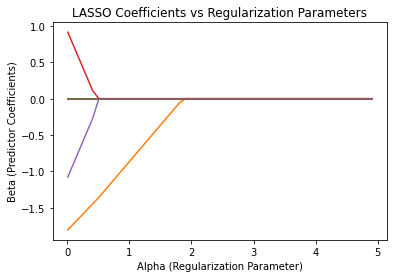

<IPython.core.display.Javascript object>

In [13]:
# Graph
coef = []
alphas = np.arange(0.01, 5, 0.10)
lasso = Lasso(max_iter=10000)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef.append(lasso.coef_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel("Alpha (Regularization Parameter)")
ax.set_ylabel("Beta (Predictor Coefficients)")
ax.set_title("LASSO Coefficients vs Regularization Parameters")
# ax.axis("tight")

In [14]:
# K Fold Cross Validation
model = LassoCV(cv=10, random_state=0, max_iter=10000)
model.fit(X_train, y_train)
model.alpha_

0.01227158587246945

<IPython.core.display.Javascript object>

In [21]:
X

,elapse,age,None,Male,Female,Other
0,211,50,0,1,0,0
1,149,40,0,1,0,0
2,168,28,0,1,0,0
3,230,37,0,1,0,0
4,389,50,0,1,0,0
...,...,...,...,...,...,...
11238,243,24,0,1,0,0
11239,197,39,0,1,0,0
11240,447,33,0,0,1,0
11241,167,24,0,1,0,0


<IPython.core.display.Javascript object>

In [20]:
coefs = np.array(model.coef_)
coefs

array([ 0.        , -1.80020286, -0.        ,  0.90757295, -1.07126652,
        0.        ])

<IPython.core.display.Javascript object>

### Final Model

$Y = -1.8002X_{age} + 0.9076X_{Male} - 1.0713X_{Female}$